# Building blocks of potential flow theory

## Introduction
Potential flow theory applies for irrotational flow, i.e. velocity fields $\mathbf{U}$ with zero curl ($\nabla\times\mathbf{U}=\mathbf{0}$). Then, the velocity field can be expressed as the gradient of a scalar function $\phi$, known as the velocity potential. Hence, we have $\mathbf{U}=\nabla\phi$. Insertion into the continutiy equation for incompressible fluids $\nabla\cdot\mathbf{U}=0$ then yields 
$$\nabla\cdot(\nabla\phi)=\nabla^2\phi=0$$
This is the Laplace equation, which is a linear, partial differential equation of second order derivatives. From the above derivation, it is clear that the Laplace equation expresses mass continuity of an irrotational flow field of an incompressible fluid. 

To solve the Laplace equation, i.e. to find a velocity potential $\phi$ that satisfy the Laplace equation, we also need boundary conditions specifying at the boundary of the domain the potential value or its derivative in the normal direction to the boundary. The fact that the Laplace equation is linear means that we can add together different solutions to obtain new solutions, provided that also boundary conditions are linear. Hence, it is relevant to look into the basic solutions to the Laplace equation, that can be used as building blocks for more complex flow fields.



## Basic solutions to the Laplace equation

### Uniform flow
The simplest flow field one typically can imagine is that of steady, uniform flow, i.e. where the fluid has a constant velocity in a given direction throughout the flow field.
<div>
<img src="Figures/uniform_flow.PNG" width="300">
</div>

Consider now a steady, uniform flow in two dimensions $\mathbf{U}=[U,V]$, where $U$ and $V$ are constant components of the velocity vector in the $x$ and $y$ directions, respectively. From the definition of a velocity potential we have
$$\frac{\partial\phi}{\partial x}=U,\qquad \frac{\partial\phi}{\partial y}=V$$
The velocity potential $\phi(x,y)$ is then found by integration,
$$\phi(x,y)=Ux+Vy$$


### Sources and sinks
A potential source is a mathematical concept, where a radial flow is discharged uniformly in all directions from a singular source point. 

<div>
<img src="Figures/point_source.PNG" width="300">  
</div>
    
The flow rate originating from the sourcepoint is defined by a parameter $m$ known as the source strength. In three dimensions, it has the unit of Volume / Time or Length^3 / Time (e.g. liters per second). In two dimensions, the source strenght has the unit (Volume/Time)/Length, or Area/Time. One can imagine a long line where fluid is dicharged in all directions normal to the line axis, where the flow rate (volume/time) is given per unit length of the line.

Now, consider a two-dimensional problem of a source placed at the origin of the $x,y$-plane. The flow velocity vector can then be expressed, using polar coordinates, in a radial component $u_r$ and an angular (azimuth) component $u_{\theta}$, such that $\mathbf{U}=[u_r,u_{\theta}]$. For a pure source, we have $u_{\theta}=0$. If we draw a circle of radius $r$ around the source point, with the source at the center, the radial flow integrated over the circle circumference must balance the flow discharged from the source point, i.e. the source strength. In other words, we require continuity of mass. Thus we have,
$$(2\pi r) u_r=m,\qquad \mathrm{or}\qquad u_r=\frac{m}{2\pi r}$$
We see that the radial flow velocity is dependent on the radial distance from the source. The gradient  operator $\nabla=[\frac{\partial}{\partial x}, \frac{\partial}{\partial y}]$ can be expressed in polar coordinates as $\nabla=[\frac{\partial}{\partial r}, \frac{1}{r}\frac{\partial}{\partial \theta}]$. We thus have
$$u_r=\frac{\partial \phi}{\partial r}=\frac{m}{2\pi r}$$
Integration then yields the potential for a 2D source
$$\phi(r,\theta)=\int\frac{m}{2\pi r}\mathrm{d}r=\frac{m}{2\pi}\ln r + C$$
where $C$ is an arbitrary constant. A sink is simply a source with negative strength $m$.



## Flow visualization with python
Now, let us explore these two building blocks by some simple calculations with Python. We define two functions, one that return the potential value for a uniform flow at a given point $(x,y)$, and one that return the potential value evaluated at the field point $(x,y)$ due to a 2D point source located at $(x_0,y_0)$.

In [1]:
import numpy as np      # Library for linear algebra and vector calculus

def uniformpotential(x, y, U, V):
    '''
    Function to compute the velocity potential of a uniform flow
    
    Arguments:
    x: x-coordinate of field point to evaluate the potential
    y: y-coordinate of field point to evaluate the potential
    U: Velocity component in x-direction
    V: Velocity component in y-direction
    '''
    phi = U*x+V*y
    return phi

def sourcepotential(x, y, m, x0=0, y0=0):
    '''
    Function to compute the velocity potential of a two-dimensional source
    
    Arguments:
    x: x-coordinate of field point to evaluate the potential
    y: y-coordinate of field point to evaluate the potential
    m: source strength
    x0: x-coordinate of source point (default value 0)
    y0: y-coordinate of source point (default value 0)
    '''
    # Radial distance from source point
    r=np.sqrt((x-x0)**2 + (y-y0)**2)
    
    # Source potential
    phi = m/(2*np.pi)*np.log(r)
    return phi


Next, let us make a mesh of points (x,y) for which to compute the potential, such that we can make some plots.

In [2]:
# Discretize x,y-plane
x, dx = np.linspace(-10,10,100, retstep=True) # Return a linearly spaced array from -10 to 10 with 100 elements, and return the step dx.
y, dy = np.linspace(-10,10,100, retstep=True)

# Create mesh and compute the potential at mesh points
X,Y = np.meshgrid(x,y)
Phi = sourcepotential(X,Y,1.) # Source

We are now ready to make some plots of the potential. Let us start with a surface plot of the potential function for a point source, i.e. a 3D plot of a surface over the x,y-plane. We then need to import some additional features to support 3D plotting. In addition, we make a 2D plot of the iso-contours of the potential. This is the lines of constant value of the potential, like height contours on a map.

Text(0.5, 1.0, 'Potential iso-contours')

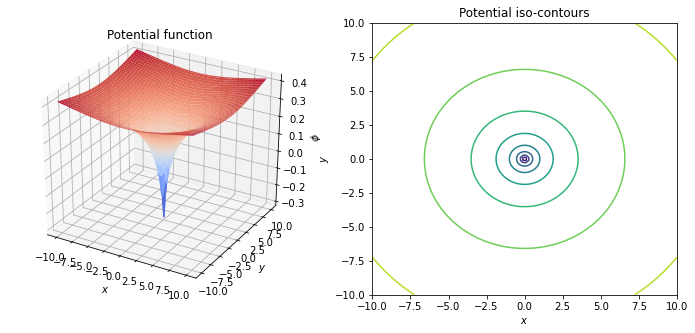

In [3]:
import matplotlib.pyplot as plt           # Library for plotting of figures
from matplotlib import gridspec           # Include support for sub-figures
from mpl_toolkits.mplot3d import Axes3D   # Include support for 3D-plots
from matplotlib import cm                 # Include color-maps for plotting

# Create the figure canvas
fig = plt.figure(figsize=(12,5))
gs = gridspec.GridSpec(nrows=1, ncols=2)

# Surface plot of the velocity potential
ax1 = fig.add_subplot(gs[0,0], projection='3d')
ax1.plot_surface(X, Y, Phi, cmap=cm.coolwarm)
ax1.set_xlabel(r'$x$')
ax1.set_ylabel(r'$y$')
ax1.set_zlabel(r'$\phi$')
ax1.set_title('Potential function')

# Contour plot of the potential
ax2 = fig.add_subplot(gs[0,1])
ax2.contour(X, Y, Phi)
ax2.set_xlabel(r'$x$')
ax2.set_ylabel(r'$y$')
ax2.set_title('Potential iso-contours')

We note that the iso-contours of the source potential are circles with center at the source location.

Next, we can have a look at the stream-lines to see how the flow field looks like. We then need to compute the gradient of the potential function. One can do it analytically, and make a separate function for calculation of the flow velocities. Here we choose to obtain the flow velocity components $u$ and $v$ by computing the gradient of the potential function numerically.

In [4]:
v, u = np.gradient(Phi, dx, dy) # Note that Phi here is a matrix containing the velocity potential evaluated at the points X, Y. 

Let us plot the flow field using streamlines and a vector field (quiver). Regarding the streamline plot, we need to define a set of starting points or seed points for the streamlines. Let us distribute a set of 30 points along a circle of radius 5. 

In [5]:
thetavec = np.linspace(0,2.*np.pi,30) # Create an array of angles between 0 and 2 pi with 30 elements
eps = 2.
x_start = eps*np.cos(thetavec) # Compute x-coordinates from the polar coordinates (r, theta) = (eps, thetavec) 
y_start = eps*np.sin(thetavec) # Compute y-coordinates from the polar coordinates (r, theta) = (eps, thetavec) 
seed_points = np.vstack((x_start, y_start)) # Vertically stack the two coordinate arrays to obtain a matrix (ndarray) of size (2,30)

We are now ready to make the streamline plot

Text(0.5, 1.0, 'Vector field')

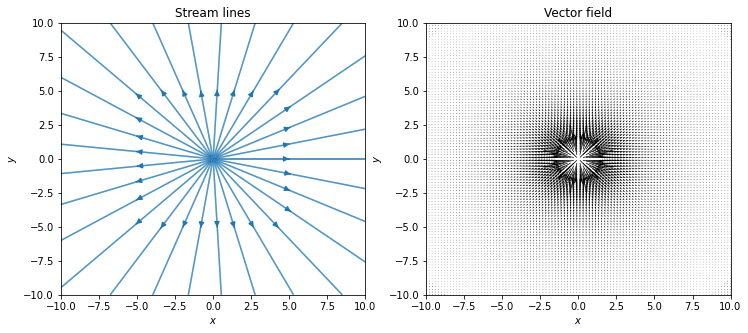

In [6]:
fig2 = plt.figure(figsize=(12,5))
gs = gridspec.GridSpec(nrows=1, ncols=2) # Create a table/grid to put the sub-figures

# Stream-line plot
ax1 = fig2.add_subplot(gs[0,0])
ax1.streamplot(x,y,u,v, density=15, start_points=seed_points.T) # We need to transpose the seed-points matrix to obtain shape (30,2).
#ax3.plot(seed_points[0], seed_points[1], 'bo')
a=10.
ax1.set_xlim(xmin=-a, xmax=a)
ax1.set_ylim(ymin=-a, ymax=a)
ax1.set_xlabel(r'$x$')
ax1.set_ylabel(r'$y$')
ax1.set_title('Stream lines')


# Vector field plot
ax2 = fig2.add_subplot(gs[0,1])
ax2.quiver(x,y,u,v, scale=5.) 
#ax3.plot(seed_points[0], seed_points[1], 'bo')
a=10.
ax2.set_xlim(xmin=-a, xmax=a)
ax2.set_ylim(ymin=-a, ymax=a)
ax2.set_xlabel(r'$x$')
ax2.set_ylabel(r'$y$')
ax2.set_title('Vector field')

### Combination of elementary flows
Due to linearity of the Laplace equation can combine different potentials into a new potential. If we add the potential of a uniform flow along the $x-$axis, $\phi=Ux$, with a source potential of strength $m=2\pi L U$

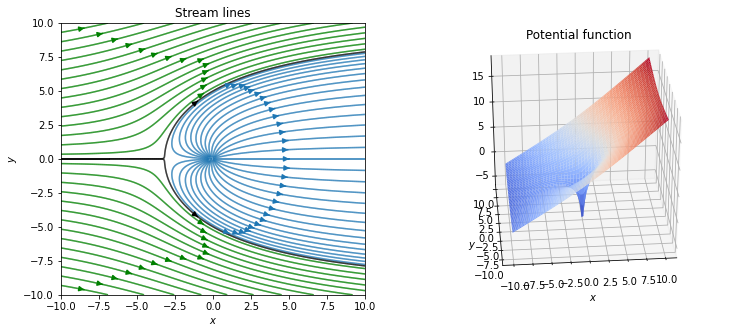

In [7]:
Phi1 = uniformpotential(X,Y,1.0, 0.0)
Phi2 = sourcepotential(X,Y,20.)
Phi = Phi1+Phi2

v, u = np.gradient(Phi, dx, dy)

# Make new seed points for the streamlines (an array of vertically distributed points at x=-10):
y_start_outer = np.linspace(-10.,10.,30)
x_start_outer = -10.*np.ones_like(y_start_outer) # Create an array of ones with the same shape as y_start
seed_points_outer = np.vstack((x_start_outer, y_start_outer))

# Create seed points for the separation lines, at x=-10, y=0+ and y=0-.
sep_lines = np.array([[-10., -10.],[0.001, -0.001]])

# Plot streamlines:
fig3 = plt.figure(figsize=(12,5))
ax1 = fig3.add_subplot(gs[0,0])
ax1.streamplot(x,y,u,v, density=15, start_points=seed_points.T)
ax1.streamplot(x,y,u,v, density=15, color='k', start_points=sep_lines.T)
ax1.streamplot(x,y,u,v, density=15, color='g',start_points=seed_points_outer.T)
a=10.
ax1.set_xlim(xmin=-a, xmax=a)
ax1.set_ylim(ymin=-a, ymax=a)
ax1.set_xlabel(r'$x$')
ax1.set_ylabel(r'$y$')
ax1.set_title('Stream lines')

# Plot potential function:
ax2 = fig3.add_subplot(gs[0,1], projection='3d')
ax2.plot_surface(X,Y,Phi, cmap=cm.coolwarm)
#ax2.plot_wireframe(X[::5,::5],Y[::5,::5],Phi3[::5,::5], color='k')
a=10.
ax2.set_xlabel(r'$x$')
ax2.set_ylabel(r'$y$')
ax2.set_title('Potential function')
ax2.view_init(elev=30., azim=-95) # Customize view angle

From the above streamline plot, we see that the flow field is divided into two regions (visualized by green and blue streamlines). The line that separates these two regions (in black color) or regimes is called a separation streamline. Looking at the surface plot of the potential, we see that there is a point on the surface (to the left of the source location) where the tangent plane is horizontal, i.e. where the gradient is zero and hence zero velocity. This is called a *stagnation point*. 

From visual inspection of the streamline plot and considering the symmetry of flow a about the $x$-axis, we see that the stagnation point must lie on the $x$-axis.  

### Combined sink and source
If we combine a source and a sink of equal strength (or two sources with strenghts $q_1=q$ and $q_2=-q$), where the location of the sources are separated an infinitesimal distance $\mathbf{l}$, we obtain what is known as a dipole (two poles). Physically, this means that all the fluid that is discharged from the source disappears again with the sink. Hence, there is no net flow of mass into the domain. However, since the source and the sink is separated by a small distance, they will set up a flow field. We will now see that the relative position of the sink and the source determine how this flow field appears. Mathematically, we obtain the velocity potential of the combined source and sink by addition
$$\phi=\phi_1+\phi_2=\frac{q_1}{2\pi}\ln(r_1)+\frac{q_2}{2\pi}\ln(r_2)$$
Inserting for the source strengths, we obtain
$$\phi=\frac{q}{2\pi}\left(\ln(r_1)-\ln(r_2)\right)=\frac{q}{2\pi}\ln\left(\frac{r_1}{r_2}\right)$$
We decompose the separation vector $\mathbf{l}$, i.e. the vector from the source point to the sink point, into $\xi\mathbf{i}+\eta\mathbf{j}$ along the $x$- and $y$-axis, respectively, such that
$$r_1=\sqrt{(x-x_1)^2+(y-y_1)^2}$$
$$r_2=\sqrt{(x-x_2)^2+(y-y_2)^2}=\sqrt{(x-(x_1+\xi))^2+(y-(y_1+\eta))^2}$$
Let us now explore the resulting flow field from the combined source and sink. For simplicity, let's put the source at the origin, i.e. $(x_1, y_1)=(0, 0)$, such that the position of the sink is $(x_2, y_2)=(\xi, \eta)$. 

Text(0, 0.5, '$y$')

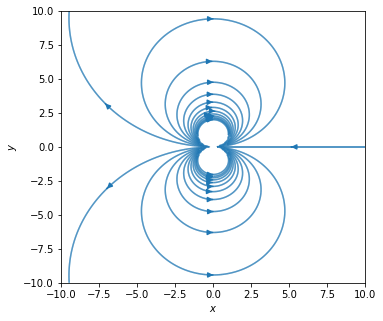

In [8]:
def combined_source_sink(x, y, q, xi, eta, x1=0, y1=0):
    '''
    x: x-coordinate of field point
    y: y-coordinate of field point
    q: source strength
    xi: x-coordinate of sink relative to source point
    eta: y-coordinate of sink relative to source point
    x1: x-coordinate of source point (default value 0)
    y1: y-coordinate of source point (default value 0)
    '''
    phi1=sourcepotential(x, y, q, x1, y1)
    phi2=sourcepotential(x, y, -q, x1+xi, y1+eta)
    phi=phi1+phi2
    
    return phi


# Let us test the above funciton and compute flow velocities:
phi = combined_source_sink(X,Y,1.0, 0.001, 0.0)

v, u = np.gradient(phi, dx, dy)

# Print streamlines using previously defined starting points:
fig4 = plt.figure(figsize=(12,5))
ax1 = fig4.add_subplot(gs[0,0])
ax1.streamplot(x,y,u,v, density=15, start_points=seed_points.T)
a=10.
ax1.set_xlim(xmin=-a, xmax=a)
ax1.set_ylim(ymin=-a, ymax=a)
ax1.set_xlabel(r'$x$')
ax1.set_ylabel(r'$y$')

Try to play with the above code-lines and see what happens if you vary the relative position between the source and the sink $(\xi, \eta)$.

### Dipole
The combination of a source and a sink of equal strength $q$ with separation vector $\bf{l}=\varepsilon(k_1,k_2)=\varepsilon\bf{k}$, where $\bf{k}$ is a unit vector defining the axis through the source and the sink, becomes a dipole in the limit $\varepsilon\rightarrow 0$. Further, the source strength $q$ is increased as $\varepsilon$ approach zero such that $q\varepsilon=m=Constant$. The parameter $m$ called is the dipole strength. It can be shown that the resulting velocity potential for the dipole can be written
$$\phi=\frac{m}{2\pi r}(k_1\cos\theta+k_2\sin\theta)$$
If we define the unit vector in polar coordinates $\bf{k}=(\cos\alpha,\sin\alpha)$, where $\alpha$ is the angle between the dipole axis and the $x$-axis, we can write
$$\phi=\frac{m}{2\pi r}(\cos\alpha\cos\theta+\sin\alpha\sin\theta)=\frac{m}{2\pi r}\cos(\theta-\alpha)$$

Text(0, 0.5, '$y$')

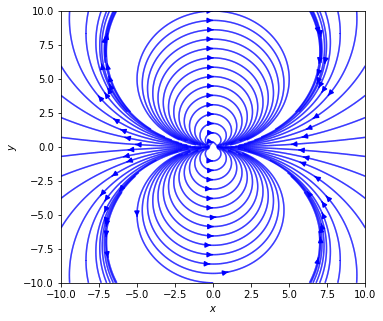

In [9]:
def dipolepotential(x, y, m, alpha, x1=0, y1=0):
    """
    x: x-coordinate of point to evaluate potential (field point)
    y: y-coordinate of point to evaluate potential (field point)
    m: source strength
    x1: x-coordinate of dipole location (default value 0)
    y1: y-coordinate of dipole location (default value 0)
    alpha: angle of dipole axis with x-axis
    """
    r=np.sqrt((x-x1)**2+(y-y1)**2)
    theta=np.arctan2((y-y1),(x-x1))
    phi=m/(2.*np.pi*r)*np.cos(theta-alpha)
    
    return phi

# Let´s put a dipole at the origin and evaluate the potential and velocity components a the mesh points
phi_dipole = dipolepotential(X, Y, 1.0, 0.0)
v, u = np.gradient(phi_dipole, dx, dy)

# Now, let´s have a look at the streamlines
yvec = np.linspace(-10.,10.,30)
xvec = np.zeros_like(yvec)
xvec_left = -7.*np.ones_like(yvec)
xvec_right = 7.*np.ones_like(yvec)

seed_points = np.vstack((xvec, yvec))
seed_points_left = np.vstack((xvec_left, yvec))
seed_points_right = np.vstack((xvec_right, yvec))

fig5 = plt.figure(figsize=(12,5))
ax1 = fig5.add_subplot(gs[0,0])
ax1.streamplot(x,y,u,v, density=15, color='b', start_points=seed_points.T)
ax1.streamplot(x,y,u,v, density=15, color='b', start_points=seed_points_left.T)
ax1.streamplot(x,y,u,v, density=15, color='b', start_points=seed_points_right.T)
a=10.
ax1.set_xlim(xmin=-a, xmax=a)
ax1.set_ylim(ymin=-a, ymax=a)
ax1.set_xlabel(r'$x$')
ax1.set_ylabel(r'$y$')

### Dipole in uniform flow
Now let us combine a uniform flow potential and a dipole, where the axis of the dipole is in the opposite direction of the uniform flow.

Text(0, 0.5, '$y$')

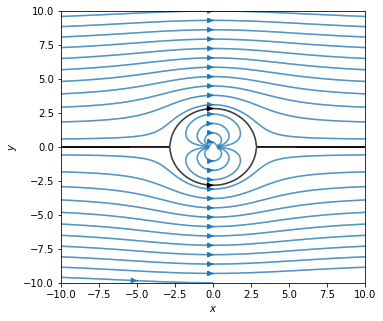

In [10]:
phi_uniform = uniformpotential(X,Y,1.0,0.0)
phi_dipole = dipolepotential(X,Y,50.,0.0)

phi = phi_dipole+phi_uniform

v, u =np.gradient(phi, dx, dy)


# Plot streamlines
fig6 = plt.figure(figsize=(12,5))
ax2 = fig6.add_subplot(gs[0,0])
ax2.streamplot(x,y,u,v, density=15, start_points=seed_points.T)
ax2.streamplot(x,y,u,v, density=15, color='k', start_points=sep_lines.T)
a=10.
ax2.set_xlim(xmin=-a, xmax=a)
ax2.set_ylim(ymin=-a, ymax=a)
ax2.set_xlabel(r'$x$')
ax2.set_ylabel(r'$y$')

### Hydrodynamic lift
Hydrodynamic lift forces are by definition hydrodynamic forces generated in the transverse direction to the incident flow. In order to have a lift force on a body, the flow around the body must be characterized by circulation $\Gamma$. Circulation is defined as 
$$\Gamma = \oint_C \bf{u}\cdot \mathrm{d}\bf{s}$$
The lift force $L$ on the body can then be obtained form Kutta-Joukowski's formula, as
$$L=\rho U\Gamma$$
where $\rho$ is the water density and $U$ is the incident flow velocity. Now, circulation can be modelled by a potential vortex, with potential 
$$\phi_{vortex}=\frac{\Gamma}{2\pi}\theta$$
The velocity compontents are easily obtained using polar coordinates $r=\sqrt{x^2+y^2}$ and $\theta=\arctan{y/x}$ as $[u_r,u_{\theta}]=\nabla\phi$, where the gradient operator in polar coordinates reads $\nabla=[\frac{\partial}{\partial r}, \frac{1}{r}\frac{\partial}{\partial \theta}]$.

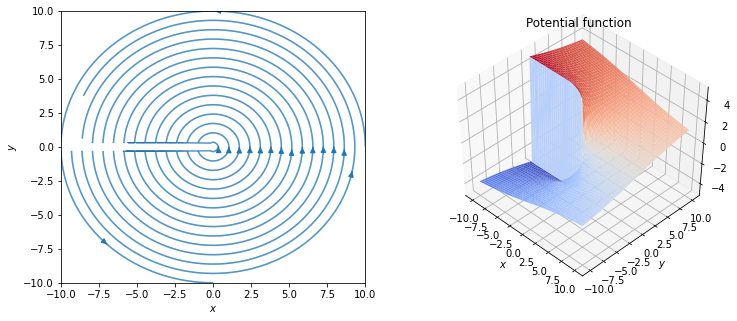

In [11]:
def vortexpotential(x, y, gamma, x1=0, y1=0):
    '''
    x: x-coordinate of point to evaluate potential (field point)
    y: y-coordinate of point to evaluate potential (field point)
    gamma: vortex strength
    x1: x-coordinate of vortex location (default value 0)
    y1: y-coordinate of vortex location (default value 0)
    '''
    theta = np.arctan2((y-y1),(x-x1)) # Note that we use the arctan2(y,x) function and not arctan(y/x). Why? Read the docs.
    
    phi = gamma/(2*np.pi)*theta
    return phi

# Compute potentials:
phi_vortex = vortexpotential(X, Y, 10.)

# Compute velocity components
v, u =np.gradient(phi_vortex, dx, dy)

# Plot streamlines
fig7 = plt.figure(figsize=(12,5))
ax2 = fig7.add_subplot(gs[0,0])
ax2.streamplot(x,y,u,v, density=15, start_points=seed_points.T)
#ax2.streamplot(x,y,u,v, density=15, color='k', start_points=sep_lines.T)
a=10.
ax2.set_xlim(xmin=-a, xmax=a)
ax2.set_ylim(ymin=-a, ymax=a)
ax2.set_xlabel(r'$x$')
ax2.set_ylabel(r'$y$')

# Plot potential function
ax2 = fig7.add_subplot(gs[0,1], projection='3d')
ax2.plot_surface(X,Y,phi_vortex, cmap=cm.coolwarm)
#ax2.plot_wireframe(X[::5,::5],Y[::5,::5],Phi3[::5,::5], color='k')
a=10.
ax2.set_xlabel(r'$x$')
ax2.set_ylabel(r'$y$')
ax2.set_title('Potential function')
ax2.view_init(elev=45., azim=-45) # Customize view angle

The geometrical shape of the potential function of a point vortex is a helical surface. Hence, it has a discontinuity in the potential at a given angle (here, the negative $x$-axis. However, the slope of the helical surface is continuous except at the origin. The reason why we see discontinous streamlines is because we have computed the velocity field by numerical differentiation of the potential function. Let us implement the analytical expression for the velocity components due to a point vortex and look at the resulting streamlines.

Text(0, 0.5, '$y$')

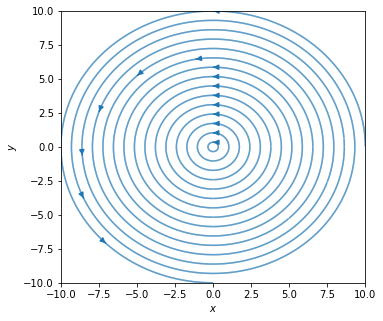

In [12]:
def vortexvelocity(x,y,gamma,x1=0,y1=0):
    
    r = np.sqrt((x-x1)**2+(y-y1)**2)
    theta = np.arctan2((y-y1),(x-x1))

    u_r = np.zeros_like(x)
    u_theta = gamma/(2*np.pi*r)
    
    # Map to Cartesian coordinates
    u = u_r*np.cos(theta) - r*u_theta*np.sin(theta)
    v = u_r*np.sin(theta) + r*u_theta*np.cos(theta)
    return u, v

u_vortex, v_vortex = vortexvelocity(X, Y, 5.)

# Plot streamlines
fig8 = plt.figure(figsize=(12,5))
ax2 = fig8.add_subplot(gs[0,0])
ax2.streamplot(x,y,u_vortex,v_vortex, density=30, start_points=seed_points.T)
#ax2.streamplot(x,y,u,v, density=15, color='k', start_points=sep_lines.T)
a=10.
ax2.set_xlim(xmin=-a, xmax=a)
ax2.set_ylim(ymin=-a, ymax=a)
ax2.set_xlabel(r'$x$')
ax2.set_ylabel(r'$y$')


Now, let us have a look at how the streamlines from a dipole and uniform flow are affected by placing a potential vortex at the dipole location

Text(0, 0.5, '$y$')

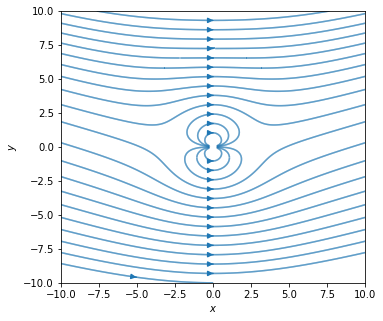

In [13]:
phi_uniform = uniformpotential(X,Y,1.0,0.0)
phi_dipole = dipolepotential(X,Y,50.,0.0)
phi = phi_uniform + phi_dipole

v, u = np.gradient(phi, dx, dy)
u_vortex, v_vortex = vortexvelocity(X, Y, 2.)

u_tot = u+u_vortex
v_tot = v+v_vortex

# Plot streamlines
fig9 = plt.figure(figsize=(12,5))
ax2 = fig9.add_subplot(gs[0,0])
ax2.streamplot(x,y,u_tot,v_tot, density=30, start_points=seed_points.T)
#ax2.streamplot(x,y,u,v, density=15, color='k', start_points=sep_lines.T)
a=10.
ax2.set_xlim(xmin=-a, xmax=a)
ax2.set_ylim(ymin=-a, ymax=a)
ax2.set_xlabel(r'$x$')
ax2.set_ylabel(r'$y$')

## Method of images
By simple techniques of mirroring (imaging) elementary potentials about some axis, we can model wall effects by creating symmetry lines. From geometrical considerations, a symmetry line of the potential funcition means that the slope of the potential surface in the normal direction to the symmetry line is zero. Hence, no flow goes through a line of symmetry of the velocity potential. To model the effect of a wall boundary in potential flow, we just have to construct a velocity potential that is symmetric about the wall. Let us explore this by applying the above derived functions. Consider a circular cylinder in uniform flow, positioned close to rigid wall. Assume the wall is along the $x$-axis and that the cylinder is placed with the cylinder axis at a normal distance $y_1=a$ from the wall. Hence, we need to create a potential function that is symmetric about the $x$-axis.

Text(0, 0.5, '$y$')

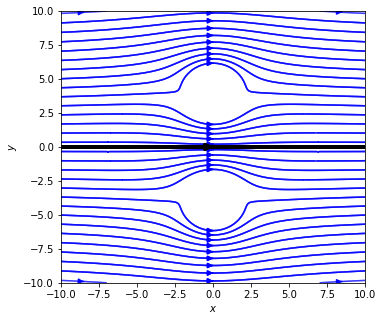

In [20]:
phi_uniform = uniformpotential(X,Y,1.0,0.0)
phi_dipole = dipolepotential(X,Y,30.,0.0, x1=0, y1=4.)
phi_mirror = dipolepotential(X,Y,30.,0.0, x1=0, y1=-4.)
phi = phi_uniform + phi_dipole + phi_mirror

# Compute velocity components
v, u = np.gradient(phi, dx, dy)

# Plot streamlines
fig10 = plt.figure(figsize=(12,5))
ax2 = fig10.add_subplot(gs[0,0])
#ax2.streamplot(x,y,u,v, density=30, color='b', start_points=seed_points.T)
ax2.streamplot(x,y,u,v, density=15, color='b', start_points=seed_points_left.T)
ax2.streamplot(x,y,u,v, density=15, color='b', start_points=seed_points_right.T)
ax2.streamplot(x,y,u,v, density=15, color='k', linewidth=4, start_points=sep_lines.T) # The wall stream-line
a = 10.
ax2.set_xlim(xmin=-a, xmax=a)
ax2.set_ylim(ymin=-a, ymax=a)
ax2.set_xlabel(r'$x$')
ax2.set_ylabel(r'$y$')